In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.max_rows = 5
ds = pd.read_csv(r"Symptom2Disease.csv")


In [46]:
ds.shape

(1200, 3)

In [47]:
ds.head(5)

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [48]:
ds.tail(5)

,Unnamed: 0,label,text
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."
1199,299,diabetes,I constantly sneeze and have a dry cough. My i...


In [49]:
ds.dtypes

Unnamed: 0     int64
label         object
text          object
dtype: object

In [50]:
##ds = ds.drop(['number'], axis=1) not needed in some versions that have excel

In [51]:
ds = ds.rename(columns={'label':'disease',
                    'text':'symptom'})

All the Dupes look a bit different in terms of sentence strurctor and wording so keeping for now. Might have to remove dupes later depending.

In [52]:
ds.loc[ds.duplicated(subset=['symptom'])].head(50)

,Unnamed: 0,disease,symptom
163,163,Chicken pox,I'm feeling fatigued and have no energy. I can...
387,87,Common Cold,I've been quite exhausted and ill. My throat h...
...,...,...,...
1048,148,gastroesophageal reflux disease,Even when I don't have anything acidic in my s...
1049,149,gastroesophageal reflux disease,"I'm not in the mood to eat, and swallowing is ..."


<Axes: >

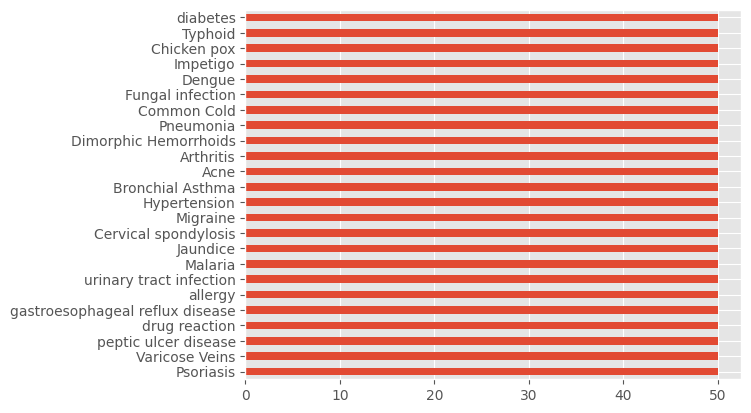

In [53]:
ds['disease'].value_counts()\
.head(24)\
.plot(kind='barh')

END OF EDA

In [54]:
ds.loc[:,'Disease_factorized'] = pd.factorize(ds['disease'])[0].reshape(-1,1)

In [55]:
import spacy.cli
from spacy.lang.en.stop_words import STOP_WORDS
stop = STOP_WORDS
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg") 


def preprocess(symptom):
    list =[]
    for token in nlp(symptom):
        if token.is_space or token.is_punct or token.is_stop:
            continue
        list.append(token.lemma_)
    return ' '.join(list) ## [8]

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [56]:
ds['preprocess'] = ds['symptom'].apply(preprocess)## [8]

In [57]:
ds.head(100)

,Unnamed: 0,disease,symptom,Disease_factorized,preprocess
0,0,Psoriasis,I have been experiencing a skin rash on my arm...,0,experience skin rash arm leg torso past week r...
1,1,Psoriasis,"My skin has been peeling, especially on my kne...",0,skin peel especially knee elbow scalp peeling ...
...,...,...,...,...,...
98,98,Varicose Veins,I am experiencing too many cramps in the last ...,1,experience cramp couple day think right believ...
99,99,Varicose Veins,The veins in my calves are protruding out quit...,1,vein calf protrude unusually worried overweigh...


In [58]:
ds['vector'] = ds.preprocess.apply(lambda symptom: nlp(symptom).vector)
ds.head(1200)## [8]

,Unnamed: 0,disease,symptom,Disease_factorized,preprocess,vector
0,0,Psoriasis,I have been experiencing a skin rash on my arm...,0,experience skin rash arm leg torso past week r...,"[1.2192994, 2.8289015, -2.2025487, 1.1896608, ..."
1,1,Psoriasis,"My skin has been peeling, especially on my kne...",0,skin peel especially knee elbow scalp peeling ...,"[0.97605723, 0.94874, -1.1472255, 0.7280576, 0..."
...,...,...,...,...,...,...
1198,298,diabetes,"I have trouble breathing, especially outside. ...",23,trouble breathe especially outside start feel ...,"[0.6334073, 0.6208037, -1.7759763, 0.760024, 2..."
1199,299,diabetes,I constantly sneeze and have a dry cough. My i...,23,constantly sneeze dry cough infection heal pal...,"[1.3577626, 0.71939456, -1.6780982, 1.83248, 0..."


END OF PRE PROCESSING

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ds['vector'].values, ds['Disease_factorized'], test_size=0.33, random_state=30, stratify = ds['Disease_factorized'])

In [60]:
X_train2 = np.stack(X_train)
#print(X_train2)
X_test2 = np.stack(X_test)
## [8]

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=300, n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier()
clf = clf.fit(X_train2,y_train)

In [62]:
prediction = clf.predict(X_test2)
prediction

array([ 7, 13,  5,  2, 17, 18, 15,  4, 16, 13, 14, 23, 23, 13, 11, 15,  1,
       22, 17,  6,  1, 13,  0,  1,  9, 23, 10, 18,  4, 19, 23, 17, 14, 12,
       14, 15, 13, 20, 13, 14,  1, 12, 20, 20,  5,  6, 13,  1, 14, 15,  6,
       14, 12, 22,  8, 10,  0, 16,  1, 15,  7, 21, 22, 15, 18,  5, 18, 21,
       20,  9,  9, 19,  6,  7, 15, 14,  2,  4, 19, 23,  0, 19,  0,  2, 14,
       21,  0, 18, 10, 16, 12, 16, 20,  3,  3, 12,  1, 18, 16,  4,  6,  2,
        9, 20,  5,  0, 11,  0,  9,  7, 22, 14, 10, 17,  9, 10, 13, 22, 10,
       14, 23, 11, 11,  7,  7, 12, 19, 20, 18,  0,  0, 23, 18, 15, 19, 15,
       22,  8, 18,  8,  3, 20,  1,  1, 22, 16, 15,  7,  9,  2,  1, 16,  2,
       14, 18,  9, 22, 12, 23,  2,  7,  4, 15, 20, 12,  8,  9, 17, 20, 19,
       17, 20,  6,  0, 19, 15, 20,  8,  4, 19, 23,  4, 14,  9, 19, 18, 18,
       15, 16,  7, 12, 15,  4, 13, 20, 11, 17,  2,  0, 16, 12, 10,  9,  4,
       10, 10,  1,  8,  3,  8,  0, 12,  0, 10, 21,  3,  2,  8,  3,  7, 13,
       14, 13,  2,  2,  7

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8661616161616161

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction, labels=[0,1])

array([[13,  1],
       [ 0, 16]])

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        16
           1       0.84      1.00      0.91        16
           2       0.71      0.71      0.71        17
           3       0.73      0.65      0.69        17
           4       0.88      0.88      0.88        16
           5       0.80      0.47      0.59        17
           6       1.00      0.94      0.97        16
           7       0.79      0.88      0.83        17
           8       0.81      0.81      0.81        16
           9       0.85      1.00      0.92        17
          10       0.94      1.00      0.97        16
          11       1.00      1.00      1.00        16
          12       0.80      0.94      0.86        17
          13       1.00      0.88      0.94        17
          14       0.89      1.00      0.94        17
          15       0.89      1.00      0.94        16
          16       1.00      1.00      1.00        16
          17       0.89    

Saving the Model using joblib
